# Proyecto final: Casas en venta en el condado King, USA 

En esta asignación, tomarás lugar de un analista de datos que trabaja en un fideicomiso de inversión en bienes raíces. Al Fideicomiso le gustaría comenzar a invertir en bienes raíces residenciales. Usted tiene la tarea de determinar el precio de mercado de una casa dado un conjunto de características. Analizará y predecirá los precios de las viviendas utilizando atributos o características como los pies cuadrados, el número de dormitorios, el número de plantas, etc.

#### Acerca del conjunto de datos

Este conjunto de datos contiene los precios de venta de viviendas para el condado de King, que incluye Seattle. Incluye las viviendas vendidas entre mayo de 2014 y mayo de 2015. Fue tomado de aquí. También se modificó ligeramente para los fines de módulo.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | Notación para una casa                                                                                      |
| date          | Fecha en la que la casa fue vendida                                                                                      |
| price         | Precio de la casa objetivo a predecir                                                                                  |
| bedrooms      | Numero de habitaciones                                                                                          |
| bathrooms     | Numero de baños                                                                                         |
| sqft_living   | Metros cuadradados de la casa                                                                                  |
| sqft_lot      | Metros cuadrados del lote                                                                                  |
| floors        | Total de pisos de la casa                                                                              |
| waterfront    | Casa con vista al mar                                                                     |
| view          | Ha sido visto                                                                                            |
| condition     | Qué tan bueno es el estado en general                                                                           |
| grade         | calificación general otorgada a la unidad de vivienda, según el sistema de calificación del condado de King |
| sqft_above    | Pies cuadrados de la casa aparte del sótano                                                                |
| sqft_basement | Metros cuadrados del sótano                                                                              |
| yr_built      | Año de construcción                                                                                                 |
| yr_renovated  | Año en que se renovó la casa                                                                              |
| zipcode       | Código Zip                                                                                                     |
| lat           | Latitud                                                                                         |
| long          | Longitud                                                                                       |
| sqft_living15 | Área de la sala de estar en 2015 (implica algunas renovaciones) Esto podría o no haber afectado el área del tamaño del lote |
| sqft_lot15    | Área de LotSize en 2015 (implica algunas renovaciones)                                                            |

#### Importar las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

## 1. Importar el conjunto de datos

In [2]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
filename = 'kc_house_data_NaN.csv'

response = requests.get(url)
with open(filename, 'wb') as file:
    file.write(response.content)

In [3]:
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Tpos de datos del dataframe.

In [4]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Resumen estadístico.

In [5]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 2. Manipulación de datos

Eliminemos las columnas que no aportan 'id', 'Unnamed: 0', 'date'.

In [6]:
df.drop(['id','Unnamed: 0'],axis=1, inplace=True)

In [7]:
df.drop(['date'],axis=1, inplace=True)

Volvemos a aplicar el resumen estadístico.

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Buscamos valores faltantes en el dataframe. Aquí algunas maneras que puedes usar para buscar valores faltantes.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21600 non-null  float64
 2   bathrooms      21603 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [10]:
df.isnull().any()

price            False
bedrooms          True
bathrooms         True
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [11]:
data_missing = df.isnull()
for columns in data_missing.columns.values.tolist():
    print(data_missing[columns].value_counts(''))
    print('')

price
False    21613
Name: count, dtype: int64

bedrooms
False    21600
True        13
Name: count, dtype: int64

bathrooms
False    21603
True        10
Name: count, dtype: int64

sqft_living
False    21613
Name: count, dtype: int64

sqft_lot
False    21613
Name: count, dtype: int64

floors
False    21613
Name: count, dtype: int64

waterfront
False    21613
Name: count, dtype: int64

view
False    21613
Name: count, dtype: int64

condition
False    21613
Name: count, dtype: int64

grade
False    21613
Name: count, dtype: int64

sqft_above
False    21613
Name: count, dtype: int64

sqft_basement
False    21613
Name: count, dtype: int64

yr_built
False    21613
Name: count, dtype: int64

yr_renovated
False    21613
Name: count, dtype: int64

zipcode
False    21613
Name: count, dtype: int64

lat
False    21613
Name: count, dtype: int64

long
False    21613
Name: count, dtype: int64

sqft_living15
False    21613
Name: count, dtype: int64

sqft_lot15
False    21613
Name: count, dtype: int64

Reemplazar los datos faltantes.

In [12]:
df['bedrooms'].value_counts()

bedrooms
3.0     9824
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: count, dtype: int64

In [13]:
df['bathrooms'].value_counts()

bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

In [14]:
df['bedrooms'].replace(np.NaN, 3, inplace=True)
df['bathrooms'].replace(np.NaN, 2.5, inplace=True)

In [15]:
df.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

## 3. Análisis Exploratorio de datos EDA

En este apartado analizaremos las variable que pueden ser candidatas para el uso de modelos predictivos.

La matriz de correlación nos mostrará que tan relacionadas se encuentran las variables entre sí.

In [16]:
df.corr()['price'].to_frame()

,price
price,1.000000
bedrooms,0.308868
bathrooms,0.525649
sqft_living,0.702035
sqft_lot,0.089661
floors,0.256794
waterfront,0.266369
view,0.397293
condition,0.036362
grade,0.667434


Algunos variables que pueden ayudar como el número de baños, los metros cuadrados por piso, la calificacion.

(0.0, 8081250.0)

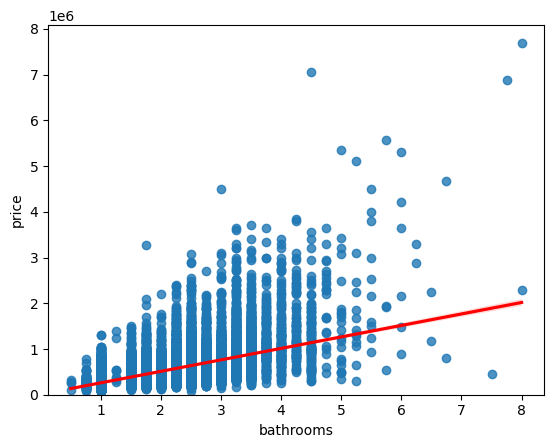

In [17]:
sns.regplot(x='bathrooms' , y= 'price', data=df, line_kws={'color':'r'})
plt.ylim(0,)

(0.0, 8084030.891986461)

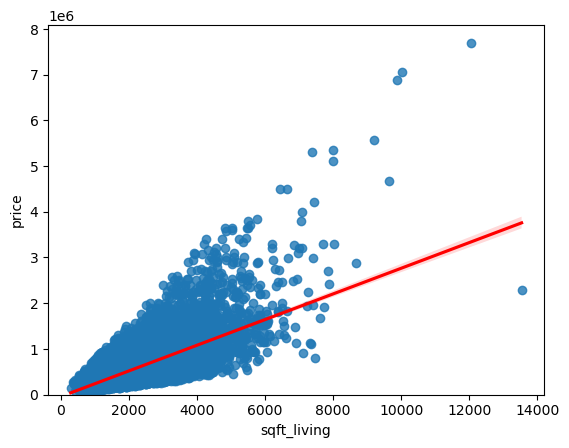

In [18]:
sns.regplot(x='sqft_living' , y= 'price', data=df, line_kws={'color':'r'})
plt.ylim(0,)

(0.0, 8129673.97464755)

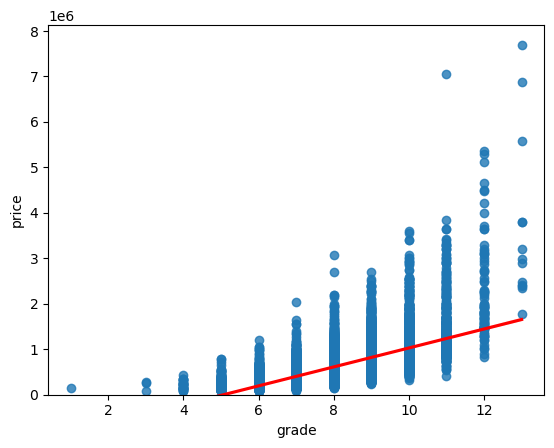

In [19]:
sns.regplot(x='grade' , y= 'price', data=df, line_kws={'color':'r'})
plt.ylim(0,)

Vemos que la mejor variable predictora podría ser el valor de metros cuadrados por piso "sqft_living".

Para el caso de variables categóricas se podría aplicar para la variable "waterfront".

<Axes: xlabel='waterfront', ylabel='price'>

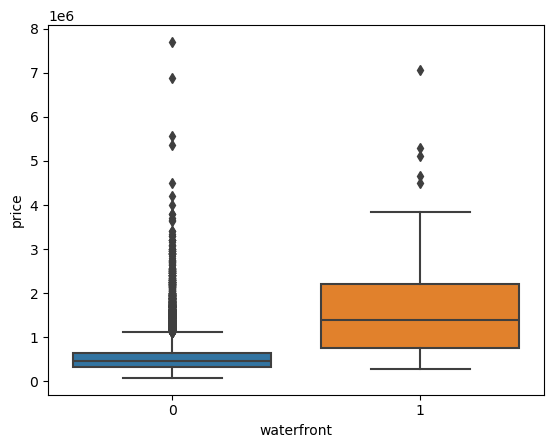

In [20]:
sns.boxplot(x = 'waterfront', y= 'price', data=df)

El gráfico nos muestra la opción de vista frente al mar con respecto al precio, sus gráficas son lo suficientemente distintas como para considerar la vista como un potencial buen predictor del precio.

## 4. Desarrollo del modelo

Relicemos un modelo de `Regresión lineal` para la variable "bathrooms", y veamos su valor de R-cuadrado.

In [21]:
# Creamos el objeto LinearRegression
lm = LinearRegression()

# Asignamos las variables dependiente e independiente
X = df[['bathrooms']]
Y = df['price']

# Entrenamos al modelo
lm.fit(X,Y)

# Calculamos el valor de R-cuadrado
print('El valor de R-cuadrado para el modelo de Regresion Lineal es:',lm.score(X,Y))

El valor de R-cuadrado para el modelo de Regresion Lineal es: 0.27630712122096013


El valor de R-cuadrado es 0.2763, lo que significa que aproximadamente el 27.62% de la variabilidad del precio de las casas es explicada por la variable "bathrooms". Es un valor relativamente bajo.

Realicemos el modelo de `Regresión lineal` usando la variable "sqft_living", y veamos su valor de R-cudrado.

In [22]:
X1 = df[['sqft_living']]

# Entrenamos la modelo
lm.fit(X1,Y)
lm.predict(X1)
# Calculamos el valor R-cuadrado
print('El valor de R-cuadrado para el modelo de Regresion Lineal es:',lm.score(X1,Y))

El valor de R-cuadrado para el modelo de Regresion Lineal es: 0.4928532179037931


El valor de R-cuadrado es 0.4928, lo que significa que aproximadamente el 49.28% de la variabilidad del precio de las casas es explicada por la variable "sqft_living".

Apliquemos un modelo de `Regresión líneal multiple` para ver si su mejora el valor de R-cuadrado.

In [23]:
index = df.corr()['price'].to_frame()
index

,price
price,1.000000
bedrooms,0.308868
bathrooms,0.525649
sqft_living,0.702035
sqft_lot,0.089661
floors,0.256794
waterfront,0.266369
view,0.397293
condition,0.036362
grade,0.667434


Primero, nos quedaremos solo con las variables que tengan una correlación significativa con la variable "price", en este caso seleccionaremos aquellas correlaciones mayores a 0.20.

In [24]:
# las columnas que no nos interesan agregado la columa de precio que es la variable a predecir
borr = index.query('price < 0.20')
lista = borr.index.tolist()
lista.append('price')
lista

['sqft_lot',
 'condition',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'long',
 'sqft_lot15',
 'price']

In [25]:
Z = df.drop(lista,axis=1).columns.values.tolist()
Z = df[Z]
Z

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,3.0,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,3.0,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,2.0,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,4.0,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,3.0,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...
21608,3.0,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,4.0,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,2.0,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,3.0,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


In [26]:
# Cramos el objeto LinnearRegresion
lm1 = LinearRegression()

# Entrenamos el modelo
lm1.fit(Z,Y)
pre = lm1.predict(Z)

# Calculamos el valor de R-cuadrado
print('El valor de R-cuadrado para el modelo de Regresion Lineal multiple es:',lm1.score(Z,Y))

El valor de R-cuadrado para el modelo de Regresion Lineal multiple es: 0.6576995432760671


El valor de R-cuadrado a incrementado a 0.5876, lo que indica que un 65.76% del precio de las casas esta explicadas por todas estas variables juntas.

Apliquemos un modelo de `Pipeline`.

In [27]:
# libreria r2_score
from sklearn.metrics import r2_score
# Creamos el pipeline creando una lista de tuplas que incluyen el nombre del modelo o estimador y su constructor correspondiente
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

# Ingresamos al constructor
pipe = Pipeline(Input)

# Convertimos los datos a float para evitar errores de conversion
Z = Z.astype(float)

# Entrenamos al modelo
pipe.fit(Z,Y)

# Realizamos una prediccion
y_hat = pipe.predict(Z)

# Calculamos el valor de R-cuadrado
print('El valor de R-cuadrado para el modelo Pipeline es:',r2_score(Y,y_hat))
print('Prediccion del modelo pipeline:',y_hat[:5])

El valor de R-cuadrado para el modelo Pipeline es: 0.7513373458628502
Prediccion del modelo pipeline: [349480.125 559298.125 449064.125 393200.125 521784.125]


El modelo pipeline parece ser el más robusto de los que se ha probado hasta ahora, con el valor más alto de R-cuadrado. Esto indica que el modelo es capaz de capturar una mayor proporción de la variabilidad en los datos y, por lo tanto, puede proporcionar mejores predicciones.

## 5. Evaluación del modelo y Refinamiento

Veamos si podemos refinar el modelo dividiendo en subconjuntos de entrenamiento y prueba usando las variables mejores en correlación con precio, recordando que estas están almacenadas en la variable Z.

In [28]:
# Importamos la libreria
from sklearn.model_selection import cross_val_score, train_test_split

In [29]:
# Aplicamos el refinamiento para Z y Y
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.20, random_state=1)
print("Numero de muestras del test :", x_test.shape[0])
print("Numero de muestas del entrenamiento:",x_train.shape[0])

Numero de muestras del test : 4323
Numero de muestas del entrenamiento: 17290


Iniciamos una `Regresión de Ridge`, asignando un hiperparametro de 0.1 para alpha.

In [30]:
# Importar la libria
from sklearn.linear_model import Ridge

In [31]:
# Creamos el objeto
RidgeModel = Ridge(alpha=0.1)

# Entrenamos el modelo
RidgeModel.fit(x_train,y_train)

# Prediccion
yhat = RidgeModel.predict(x_test)
print('Prediccion:', yhat[0:4])
print('conjunto de pruebas :', y_test[0:4].values)

# R-cuadrado
print("El valor de R-cuadrado del modelo de Ridge es:",RidgeModel.score(x_test, y_test))

Prediccion: [652079.16045536 512753.30456092 809472.44947973 706073.62299637]
conjunto de pruebas : [ 459000.  445000. 1057000.  732350.]
El valor de R-cuadrado del modelo de Ridge es: 0.6459293522480059


Creemos una transformación polinómica de grado a varios grados para ver como evoluciona.

In [32]:
grades = [2,3,4]

for i in grades:
    pr=PolynomialFeatures(degree=i)

    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    RidgeModel.fit(x_train_pr, y_train)
    yhat1 = RidgeModel.predict(x_test_pr)
    print(f'Prediction de grado {i}:', yhat1[0:4])
    print(f'data test de grado {i}:', y_test[0:4].values)
    print(f"R-square de grado {i}: ",r2_score(y_test,yhat1))
    print('')

Prediction de grado 2: [572270.49537664 490500.3968757  629724.33752157 681236.33283694]
data test de grado 2: [ 459000.  445000. 1057000.  732350.]
R-square de grado 2:  0.7543149508664767

Prediction de grado 3: [598257.75359368 456572.56218743 750411.56023431 686271.03289056]
data test de grado 3: [ 459000.  445000. 1057000.  732350.]
R-square de grado 3:  0.715073049106209

Prediction de grado 4: [ 556312.61492193  452120.61492193 1266968.61492193  638232.61492193]
data test de grado 4: [ 459000.  445000. 1057000.  732350.]
R-square de grado 4:  -110.7876130391378



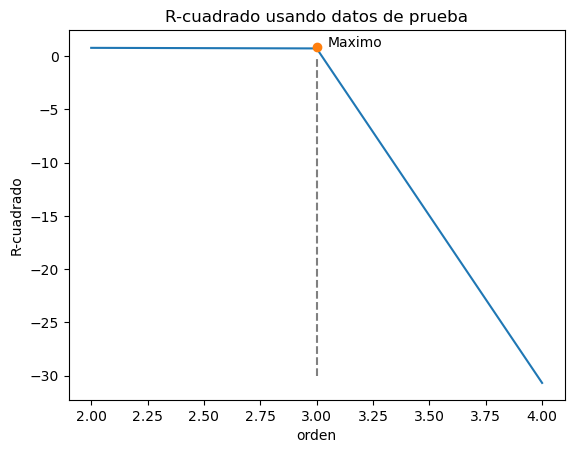

In [33]:
Rsqu_test = []

for n in grades:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train)
    
    x_test_pr = pr.fit_transform(x_test)   
    
    lr = LinearRegression()
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(grades, Rsqu_test)
plt.xlabel('orden')
plt.ylabel('R-cuadrado')
plt.title('R-cuadrado usando datos de prueba')
plt.text(3.05, 0.85, 'Maximo') 
plt.plot(3, 0.85,marker ="o")
plt.plot([3,3],[-30, 0], color='gray', linestyle='--')

La gráfica muestra una deficiencia en el valor de R-cuadrado para polinomio mayores a 3.

El mejor valor de R-cuadrado es el del polinomio de grado 2 con un valor de 0.7543149508664767, mejorando el modelo de Ridge sin transformación polinomial que fue de 0.645.

## Conclusión

Después de evaluar varios modelos de regresión en un conjunto de datos para predecir los precios de viviendas en el condado King, USA, aquí están las conclusiones:

1. Modelo de **regresión lineal simple** utilizando solo la variable "sqft_living":

**R-cuadrado:**  0.492

Este modelo proporciona una estimación inicial de cómo la variable "sqft_living" está relacionada con el precio de las viviendas. Sin embargo, su capacidad de predicción es moderada y limitada debido a la simplicidad del modelo.

2. Modelo de **regresión lineal múltiple** utilizando varias variables predictoras:

**R-cuadrado:** 0.657

Al incluir múltiples variables predictoras, el modelo mejora en términos de capacidad de predicción en comparación con el modelo simple de una sola variable. Sin embargo, aún queda espacio para mejorar la capacidad predictiva.

3. Modelo de **regresión utilizando un pipeline** con escalado de características y expansión polinomial:

**R-cuadrado:** 0.751

Este modelo, que incluye escalado de características y expansión polinomial, muestra un rendimiento mejorado en términos de R-cuadrado en comparación con los modelos anteriores. La capacidad de predicción ha mejorado significativamente gracias a la transformación de características y la inclusión de términos polinomiales.

4. Modelo de **regresión Ridge** sin transformación polinomial:
   
**R-cuadrado:** 0.645

La inclusión de regularización Ridge en el modelo sin transformación polinomial ha disminuido ligeramente la capacidad de predicción en comparación con el modelo de regresión usando pipeline. Sin embargo, es posble mejorar el rendimiento aplicando transformaciones polinomiales.

5. Modelo de **regresión Ridge con transformación polinomial de grado 2**:
   
**R-cuadrado:** 0.754

La adición de transformación polinomial de grado 2 al modelo de regresión Ridge ha mejorado significativamente la capacidad de predicción en comparación con el modelo de regresión Ridge sin transformación polinomial. Sin embargo, todavía tiene un rendimiento ligeramente inferior al modelo con pipeline.

Aplicando las predicciones del mejor modelo que en este caso es de pipeline y el de Ridge con polinomio de grado 2.

#### Prediccion mediante pipeline

In [34]:
df['pred_price_pipe'] = y_hat
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pred_price_pipe
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,349480.125
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,559298.125
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,449064.125
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,393200.125
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,521784.125
5,1225000.0,4.0,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2036440.125
6,257500.0,3.0,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,210352.125
7,291850.0,3.0,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,291176.125
8,229500.0,3.0,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,442532.125
9,323000.0,3.0,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,290708.125


#### Predicción mediante Ridge

In [35]:
pr=PolynomialFeatures(degree=2)

x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
yhat1 = RidgeModel.predict(x_test_pr)

print(yhat1[:5])
print(yhat1.size)

[572270.49537664 490500.3968757  629724.33752157 681236.33283694
 328226.40657135]
4323


Predicción para todos los datos.

In [36]:
# Aplicamos el modelo RidgeModel de grado 2 entrenado a las variables de Z
yhat_all = RidgeModel.predict(pr.transform(Z))
print(yhat_all[:5])
print(yhat_all.size)
print("R-square: ",r2_score(Y,yhat_all))

[305221.39605183 627909.73775155 501340.10913156 357507.78595174
 487182.94002141]
21613
R-square:  0.7373070695120434


Agregamos la predicción al dataframe.

In [37]:
df['pred_price_Ridge'] = yhat_all
df[['pred_price_Ridge']] = np.round(df[['pred_price_Ridge']],3)
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pred_price_pipe,pred_price_Ridge
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,349480.125,305221.396
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,559298.125,627909.738
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,449064.125,501340.109
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,393200.125,357507.786
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,521784.125,487182.940
5,1225000.0,4.0,4.50,5420,101930,1.0,0,0,3,11,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,2036440.125,1952043.534
6,257500.0,3.0,2.25,1715,6819,2.0,0,0,3,7,...,0,1995,0,98003,47.3097,-122.327,2238,6819,210352.125,245279.779
7,291850.0,3.0,1.50,1060,9711,1.0,0,0,3,7,...,0,1963,0,98198,47.4095,-122.315,1650,9711,291176.125,279664.790
8,229500.0,3.0,1.00,1780,7470,1.0,0,0,3,7,...,730,1960,0,98146,47.5123,-122.337,1780,8113,442532.125,403267.383
9,323000.0,3.0,2.50,1890,6560,2.0,0,0,3,7,...,0,2003,0,98038,47.3684,-122.031,2390,7570,290708.125,279531.877


El modelo de regresión utilizando un **pipeline con escalado de características y expansión polinomial** y el modelo de **Ridge con transformación polinomial de grado 2**, son los mejores modelos en términos de capacidad de predicción, la elección de un modelo a usar depederá de su uso.
De igual manera el valor del hiperparámetro alpha debería ser buscado y analizado, en este caso hemos usado un estimado para el valor.

Es importante considerar que el R-cuadrado por sí solo no proporciona una imagen completa del rendimiento del modelo. Es posible que se deba complementar esta métrica con otras, como el error cuadrático medio (MSE) o el error absoluto medio (MAE), para obtener una evaluación más completa del rendimiento del modelo, pero debido a que este es trabajo con el objetivo de aprender acerca del tratamiento de datos y modelos de predicción, no se considerarán esos factores,

<hr/>

## Autor:
Jonathan Palan

## Carga y cambios

| Fecha             |Por         |  Descripción                                  |
| -----------------| ---------------| ----------------------------------------------|
| 2024-05-10      | Jonathan Palan | Traducción curso Data Analysis with Python|

## Bibliografía

[1] IBM,"Data Analysis with Python", Skills Network 
<hr/>